# Weighted interval scheduling
Following Kleinberg and Tardos


## Problem Description:
 Given a set of activities (or tasks) with start time, finish time and weight, select a compatible (non overlapping) subset of requests so as to maximize the total weight.

## Algorithm Description
Unlike the unweighted case, the greedy algorithm does not work in general. A dynamic solution works well

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from itertools import combinations
import matplotlib.patches as patches

## Choose colors

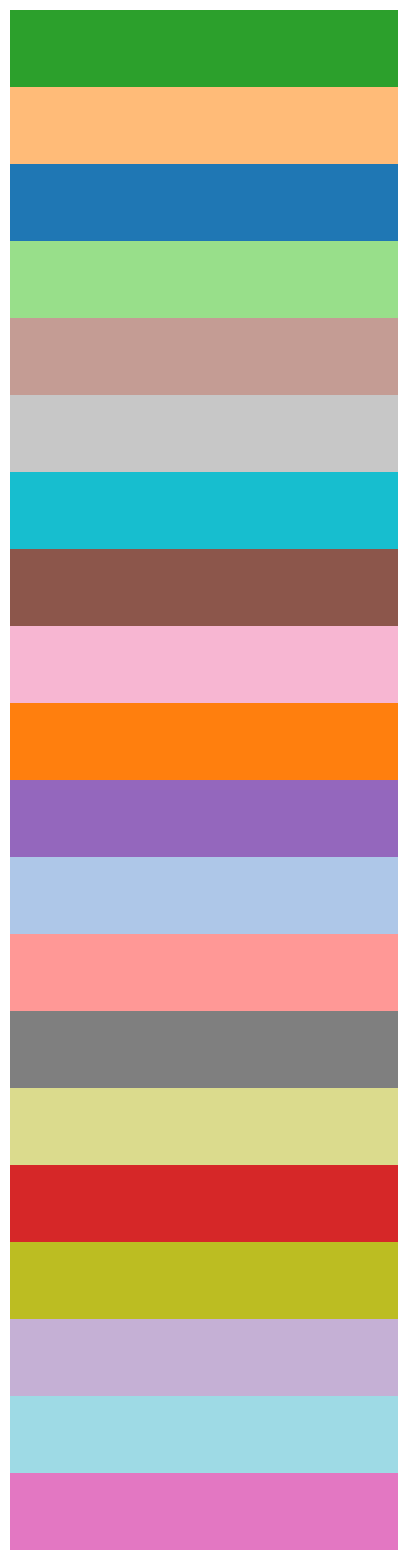

In [2]:
cmap = plt.cm.tab20
colors = [cmap(i) for i in range(20)]
random.shuffle(colors)
          
def display_colors(color_list):
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(5, len(color_list)))

    # Display each color as a rectangle
    for idx, color in enumerate(color_list):
        rect = patches.Rectangle((0, idx), 5, 1, linewidth=1, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    # Adjust the view
    ax.set_xlim(0, 3)
    ax.set_ylim(0, len(color_list))
    ax.axis('off')  # Hide the axis
    plt.show()
display_colors(colors)

## Generate instances

In [3]:
def generate_intervals(number_of_intervals=20,min_start=0,max_start=50,max_length=20):
    ans=[]
    for i in range(number_of_intervals):
        line=dict()
        line["start"]=np.random.choice(range(min_start,max_start))
        line["end"]=line["start"]+np.random.choice(range(1,max_length))
        line["weight"]=np.random.choice(range(100))
        ans.append(line)
    ans=sorted(ans,key=lambda x: x['end'])
    for line in ans:
        line["index"]=ans.index(line)
    return ans

## Plot Instance

In [4]:
def plot_instance(instance,color="black"):
    if color=="black":
        color=["black"]*len(instance)

    # Create a new figure and axis object
    fig, ax = plt.subplots()
    lines_data = instance
    # Plot each horizontal line
    for line in lines_data:
        l,=ax.plot([line["start"], line["end"]], [line["index"], line["index"]])
        l.set_linewidth(3)
        l.set_color(color[lines_data.index(line)])
    return plt.show()


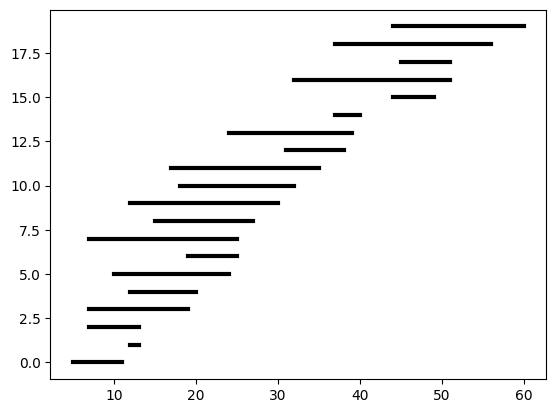

In [5]:
plot_instance(generate_intervals())

## Check collision

In [6]:
def check_collision(x,y):
    ans=True
    if x["start"]>=y["end"] or y["start"]>=x["end"]:
        ans= False
    return ans

## Find previous
In this algorithm the intervals are ordered by finishing time. The previous compatible is the largests
j < i such that interval j is compatible with interval i 

In [7]:
def find_previous(requests):
    previous=dict()
    for i in range(len(requests)):
        candidates=[-1]
        for j in range(i):
            if not check_collision(requests[i],requests[j]):
                candidates.append(j)
        previous[i]=max(candidates)
    return previous

In [8]:
requests=generate_intervals()

In [9]:
requests

[{'start': 3, 'end': 6, 'weight': 17, 'index': 0},
 {'start': 4, 'end': 6, 'weight': 21, 'index': 1},
 {'start': 8, 'end': 11, 'weight': 48, 'index': 2},
 {'start': 1, 'end': 14, 'weight': 31, 'index': 3},
 {'start': 7, 'end': 15, 'weight': 48, 'index': 4},
 {'start': 0, 'end': 18, 'weight': 23, 'index': 5},
 {'start': 15, 'end': 23, 'weight': 95, 'index': 6},
 {'start': 17, 'end': 27, 'weight': 58, 'index': 7},
 {'start': 22, 'end': 30, 'weight': 64, 'index': 8},
 {'start': 32, 'end': 33, 'weight': 19, 'index': 9},
 {'start': 18, 'end': 33, 'weight': 47, 'index': 10},
 {'start': 17, 'end': 33, 'weight': 4, 'index': 11},
 {'start': 19, 'end': 34, 'weight': 33, 'index': 12},
 {'start': 20, 'end': 34, 'weight': 68, 'index': 13},
 {'start': 17, 'end': 35, 'weight': 6, 'index': 14},
 {'start': 23, 'end': 41, 'weight': 98, 'index': 15},
 {'start': 25, 'end': 41, 'weight': 54, 'index': 16},
 {'start': 32, 'end': 44, 'weight': 53, 'index': 17},
 {'start': 36, 'end': 48, 'weight': 63, 'index':

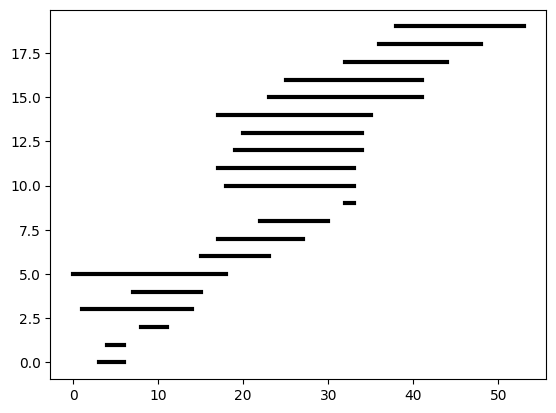

In [10]:
plot_instance(requests)

In [11]:
find_previous(requests)

{0: -1,
 1: -1,
 2: 1,
 3: -1,
 4: 1,
 5: -1,
 6: 4,
 7: 4,
 8: 5,
 9: 8,
 10: 5,
 11: 4,
 12: 5,
 13: 5,
 14: 4,
 15: 6,
 16: 6,
 17: 8,
 18: 14,
 19: 14}

## Weight function

In [12]:
## A function that computes the total weight of a list of requests
def weight(intervals:list):
    return sum([interval["weight"] for interval  in intervals])

## Dynamic algorithm for weighter interval scheduling
### Here it is assumed that the intervals are sorted by finishing time

In [13]:
def dynamic_algo_interval(intervals:list):#
    # Takes a list of intervals, where each 
    # interval is a dictionary with keys {"start","end","weight","index"}
    # Returns a dictionary where the keys are indices and values are optimal solutions for the partial problem
    previous=find_previous(intervals)
    answer=dict()
    answer[-1]=[]
    answer[0]=[0]
    for i in range(1,len(intervals)):
        ans=answer[previous[i]]+[i]
        if weight([intervals[i] for i in answer[i-1]])>weight([intervals[i] for i in ans]):
            ans=answer[i-1]
        answer[i]=ans
    return answer
    

In [14]:
dynamic_algo_interval(requests)

{-1: [],
 0: [0],
 1: [1],
 2: [1, 2],
 3: [1, 2],
 4: [1, 4],
 5: [1, 4],
 6: [1, 4, 6],
 7: [1, 4, 6],
 8: [1, 4, 6],
 9: [1, 4, 6, 9],
 10: [1, 4, 6, 9],
 11: [1, 4, 6, 9],
 12: [1, 4, 6, 9],
 13: [1, 4, 6, 9],
 14: [1, 4, 6, 9],
 15: [1, 4, 6, 15],
 16: [1, 4, 6, 15],
 17: [1, 4, 6, 15],
 18: [1, 4, 6, 15],
 19: [1, 4, 6, 15]}

## Paint answer

In [15]:
def paint_answer(requests):
    N=len(requests)
    remaining=dynamic_algo_interval(requests)[N-1]
    color=["black"]*N
    for i in remaining:
        color[i]="deeppink"

    return plot_instance(requests,color=color)

In [16]:
requests=generate_intervals(number_of_intervals=30)

In [17]:
a=dynamic_algo_interval(requests)

In [115]:
list(a.values())

[[],
 [0],
 [1],
 [1],
 [1, 3],
 [1, 3],
 [1, 3, 5],
 [1, 3, 6],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7, 13],
 [1, 3, 5, 7, 13, 14],
 [1, 3, 5, 7, 13, 14],
 [1, 3, 5, 7, 13, 14],
 [1, 3, 5, 7, 13, 14],
 [1, 3, 5, 7, 13, 14, 18],
 [1, 3, 5, 7, 13, 14, 18],
 [1, 3, 5, 7, 13, 14, 18, 20],
 [1, 3, 5, 7, 13, 14, 18, 20, 21],
 [1, 3, 5, 7, 13, 14, 18, 20, 21],
 [1, 3, 5, 7, 13, 14, 18, 20, 21],
 [1, 3, 5, 7, 13, 14, 18, 20, 21, 24],
 [1, 3, 5, 7, 13, 14, 18, 20, 21, 24],
 [1, 3, 5, 7, 13, 14, 18, 20, 21, 24],
 [1, 3, 5, 7, 13, 14, 18, 20, 21, 24],
 [1, 3, 5, 7, 13, 14, 18, 20, 21, 24],
 [1, 3, 5, 7, 13, 14, 18, 20, 21, 24]]

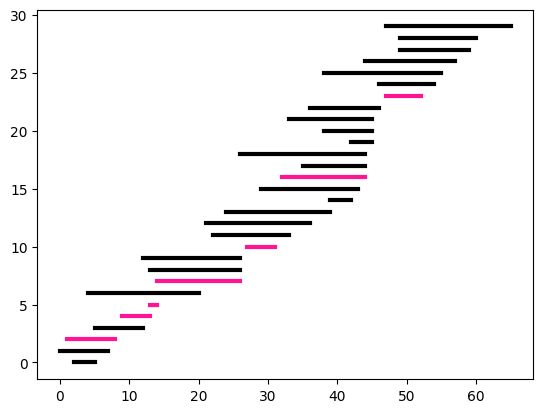

In [18]:
paint_answer(requests)

## Animate Weighted Interval Scheduling

In [19]:
def animate_weighted_scheduling(instance:list):# takes a lisf of requests where each request is a dictionary
   
    
    fig, ax = plt.subplots()
    #Setting the background colors
    ax.set_facecolor('black')
    fig.set_facecolor('black')
    ## choose colors
    accept_color="lightgreen"
    reject_color="deeppink"
    #setup the figure
    ax.set_title("Animation of Weighted Interval Scheduling",fontsize=15,color="white") ## make title
    N=len(instance)
        
    horlines=[]
    # Plot each horizontal line
    for line in instance:
            horline,=ax.plot([line["start"], line["end"]], [line["index"], line["index"]])
            horline.set_linewidth(3)
            horlines.append(horline)
    ## Set the frames    
    frames=list(enumerate(list(dynamic_algo_interval(instance).values())))
    ## make counter
    counter_text = ax.text(0.4, 0.1, '', transform=ax.transAxes, ha='left', va='top',color="white",fontsize=13)
    ## The update function draws the next interval 
    
    def update(partial_solution):
        for index in range(N):   
            if index in partial_solution[1]:
                horlines[index].set_color(accept_color)
            else:
                 horlines[index].set_color(reject_color)
            # Update counter
        W=weight([instance[k] for k in partial_solution[1]])
        counter_text.set_text(f"The solution up to {partial_solution[0]} has weight {W}")
        return horlines

    ani = FuncAnimation(fig, update, frames=frames,blit=True)#init_func=init,blit=True)
    return HTML(ani.to_jshtml())

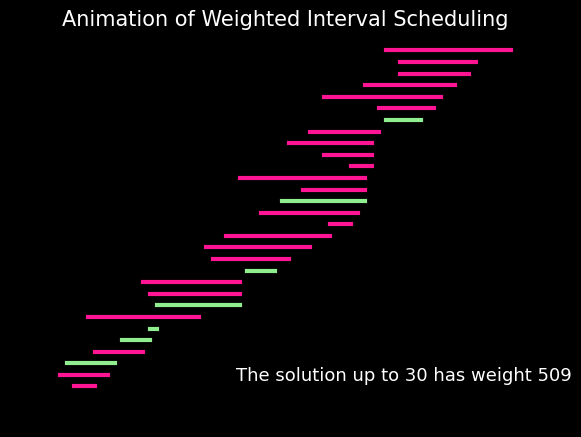

In [20]:
animate_weighted_scheduling(requests)